<a href="https://colab.research.google.com/github/apolloadeniran/Assignment/blob/main/Adeniran_Lateef_Ariyo_Binary_Classification_of_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()

In [31]:
# Store features matrix in
data = pd.DataFrame(data = np.c_[iris['data']],
                    columns=iris['feature_names'])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [32]:
# Store target vector in
target = pd.DataFrame(data = np.c_[iris['target']],
                    columns=['Species'])
target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [33]:
df = pd.concat([data, target], axis=1)
df = df.loc[df['Species'].isin([1, 2])]
df = df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [34]:
df1 = df.loc[:,['sepal length (cm)', 'petal length (cm)', 'Species']]
df1.head()

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


# Problem 2

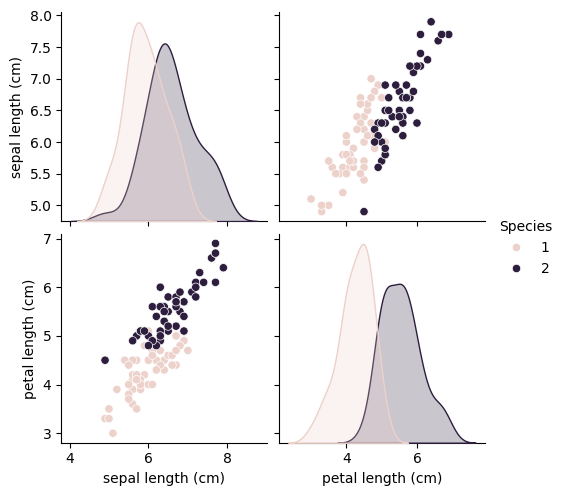

In [35]:
sns.pairplot(df1, hue='Species')

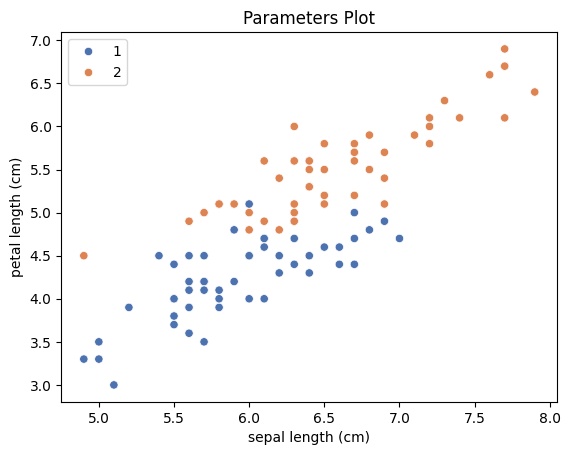

In [36]:
plt.title('Parameters Plot')
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df1, hue='Species', palette='deep')
plt.legend(loc='upper left')
plt.show()

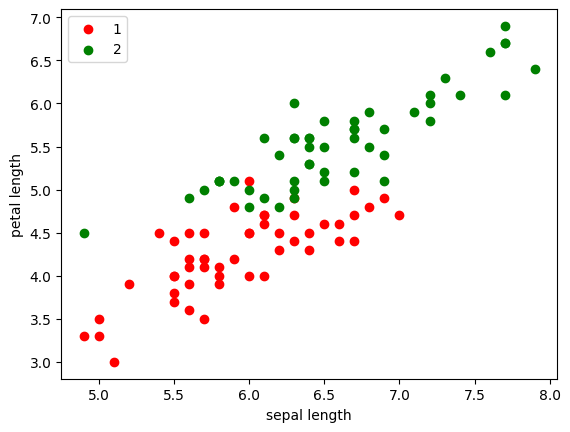

In [37]:
# Another Method
colors = ['red', 'green']
species = [1, 2]

for i in range(2):
    x = df1[df1['Species'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

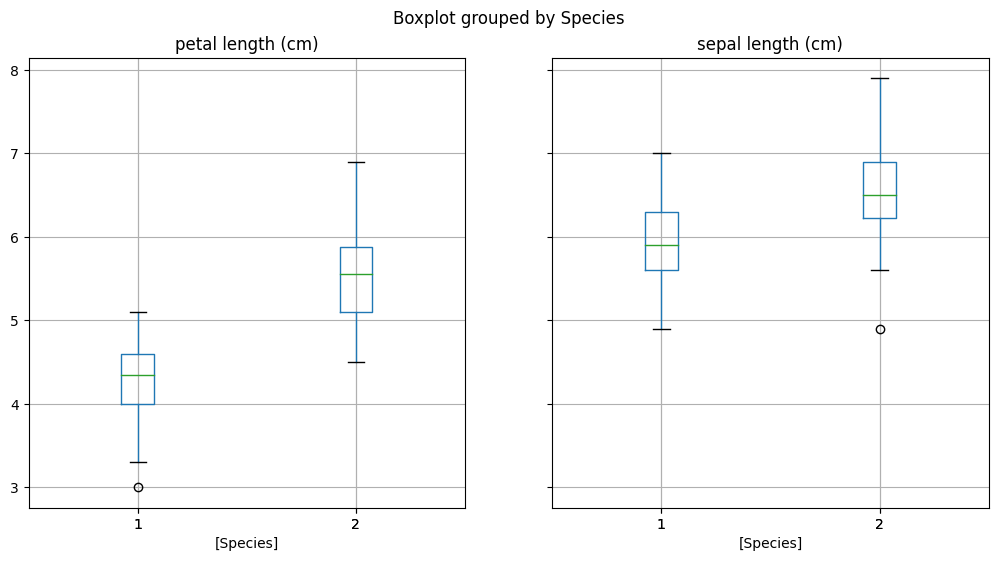

In [38]:
df1.boxplot(by='Species', figsize=(12, 6))
plt.show()

<Axes: xlabel='Species', ylabel='sepal length (cm)'>

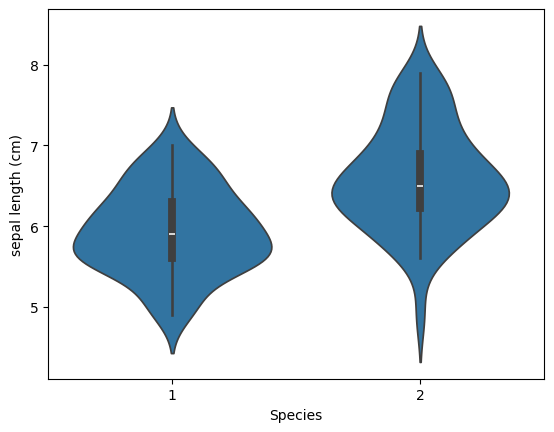

In [39]:
sns.violinplot(x='Species', y='sepal length (cm)', data=df1)

In [40]:
X = np.array(df1.loc[:,['sepal length (cm)', 'petal length (cm)']])
X.shape

(100, 2)

In [41]:
y = np.array(df1.loc[:,['Species']]).ravel()
y.ndim

1

# Problem 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(75, 2)

In [ ]:
X_test.shape

(25, 2)

In [ ]:
y_train.ndim

1

# Problem 4

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_trainTransform = scaler.transform(X_train)
X_testTransform = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Create a Robustcaler instance
scalermethod = RobustScaler()

# Fit and trasform the data
X_trainTransform = scalermethod.fit_transform(X_train)
X_testTransform = scalermethod.fit_transform(X_test)


print("Original Data:\n", X_train)
print("Scaled Data:\n", X_trainTransform)

Original Data:
 [[6.7 4.4]
 [5.5 4.4]
 [6.3 5. ]
 [5.2 3.9]
 [7.7 6.7]
 [5.9 4.2]
 [6.2 4.3]
 [7.7 6.1]
 [6.  4.5]
 [6.8 5.9]
 [5.7 4.5]
 [6.5 5.5]
 [6.4 5.3]
 [6.  4.5]
 [5.6 4.5]
 [5.7 4.1]
 [5.4 4.5]
 [4.9 3.3]
 [6.7 5.2]
 [6.7 5. ]
 [5.6 3.9]
 [7.9 6.4]
 [6.6 4.4]
 [6.8 5.5]
 [6.1 4.7]
 [6.4 4.3]
 [5.5 4. ]
 [5.8 4.1]
 [5.6 4.1]
 [6.6 4.6]
 [6.4 5.6]
 [6.3 4.7]
 [5.8 5.1]
 [6.7 4.7]
 [6.9 5.4]
 [4.9 4.5]
 [5.9 5.1]
 [6.5 5.8]
 [5.  3.3]
 [6.3 6. ]
 [7.7 6.7]
 [5.7 4.2]
 [7.7 6.9]
 [6.4 5.3]
 [6.5 5.2]
 [7.2 5.8]
 [6.1 4.6]
 [6.7 5.8]
 [5.1 3. ]
 [6.2 5.4]
 [7.3 6.3]
 [7.2 6. ]
 [5.8 3.9]
 [6.7 5.7]
 [7.2 6.1]
 [5.7 5. ]
 [6.1 5.6]
 [6.3 4.4]
 [5.7 3.5]
 [6.4 4.5]
 [7.1 5.9]
 [6.1 4. ]
 [6.9 4.9]
 [6.1 4.7]
 [6.4 5.5]
 [6.9 5.1]
 [6.7 5.7]
 [6.3 5.6]
 [6.4 5.6]
 [5.9 4.8]
 [6.5 5.1]
 [5.6 4.9]
 [5.6 3.6]
 [5.8 5.1]
 [5.8 5.1]]
Scaled Data:
 [[ 0.44444444 -0.5       ]
 [-0.88888889 -0.5       ]
 [ 0.          0.        ]
 [-1.22222222 -0.91666667]
 [ 1.55555556  1.41666667]
 [-0.4444

# Problem 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 5)
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred5 = classifier5.predict(X_testTransform)
print('pred5 = ', y_pred5)

# Instantiate learning model (k = 1)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred1 = classifier1.predict(X_testTransform)
print('pred1 = ', y_pred1)

# Instantiate learning model (k = 3)
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred3 = classifier3.predict(X_testTransform)
print('pred3 = ', y_pred3)

pred5 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]
pred1 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
pred3 =  [2 2 2 1 1 1 2 2 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]


# Problem 6

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

prediction = [y_pred5, y_pred1, y_pred3]
keys = ["knn5", "knn1", "knn3"]

for a, prediction in enumerate(prediction, 0):
    print("prediction of = ", keys[a])
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("Precision score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
    print('......................................................')

prediction of =  knn5
Accuracy =  84.0
Recall =  [0.78571429 0.90909091]
F1 score =  [0.84615385 0.83333333]
Precision score =  [0.91666667 0.76923077]
Confusion =  [[11  3]
 [ 1 10]]
......................................................
prediction of =  knn1
Accuracy =  92.0
Recall =  [0.85714286 1.        ]
F1 score =  [0.92307692 0.91666667]
Precision score =  [1.         0.84615385]
Confusion =  [[12  2]
 [ 0 11]]
......................................................
prediction of =  knn3
Accuracy =  80.0
Recall =  [0.71428571 0.90909091]
F1 score =  [0.8 0.8]
Precision score =  [0.90909091 0.71428571]
Confusion =  [[10  4]
 [ 1 10]]
......................................................


# Problem 7

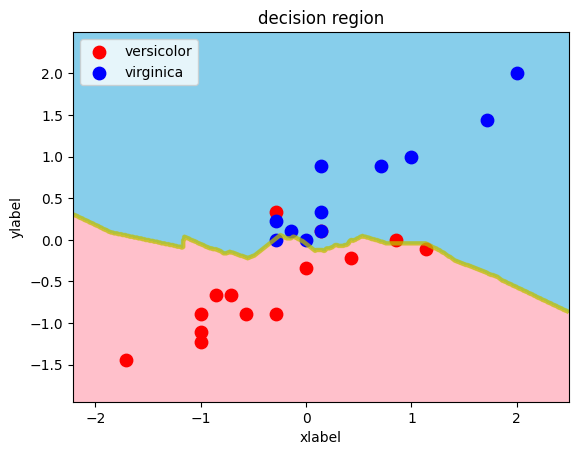

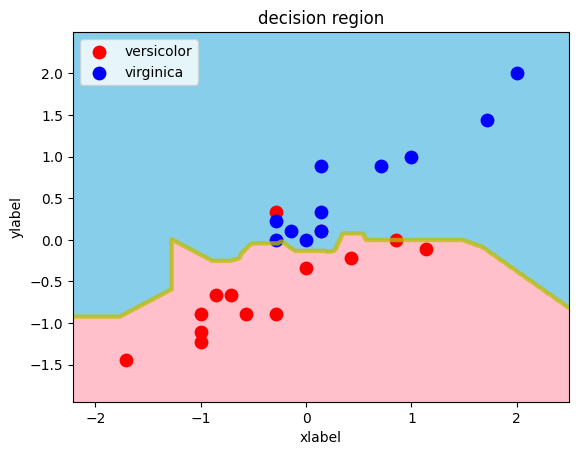

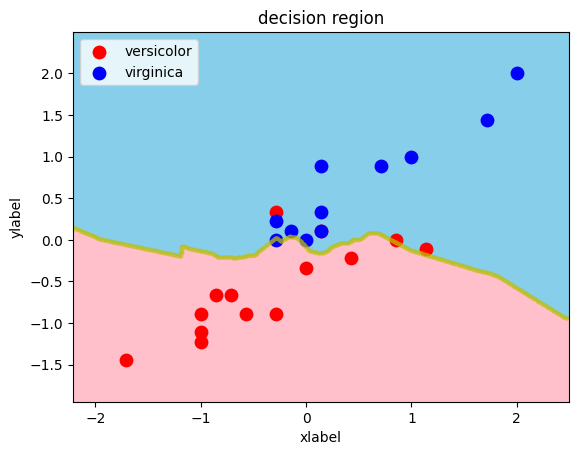

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [classifier5, classifier1, classifier3]
for a, model in enumerate(models, 1):
    decision_region(X_testTransform, y_test, model)

# Problem 8

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_trainTransform, y_train)
y_predn = neigh.predict(X_testTransform)

KNN
Accuracy =  84.0
Recall =  [0.78571429 0.90909091]
F1 score =  [0.84615385 0.83333333]
Precision score =  [0.91666667 0.76923077]
Confusion =  [[11  3]
 [ 1 10]]


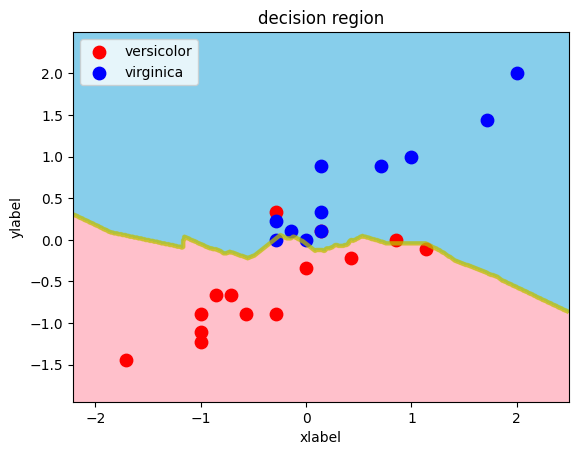

In [ ]:
print("KNN")
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predn)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predn, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predn, average=None))
print("Precision score = ", precision_score(y_true=y_test, y_pred=y_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predn))
decision_region(X_testTransform, y_test, neigh)
print('\n')

In [ ]:
#SVM
svmcl = svm.SVC()
svmcl.fit(X_trainTransform, y_train)
y_pred_svm = svmcl.predict(X_testTransform)

SVM
Accuracy =  84.0
Recall =  [0.78571429 1.        ]
F1 score =  [0.88 0.88]
Precision score =  [1.         0.78571429]
Confusion =  [[11  3]
 [ 0 11]]


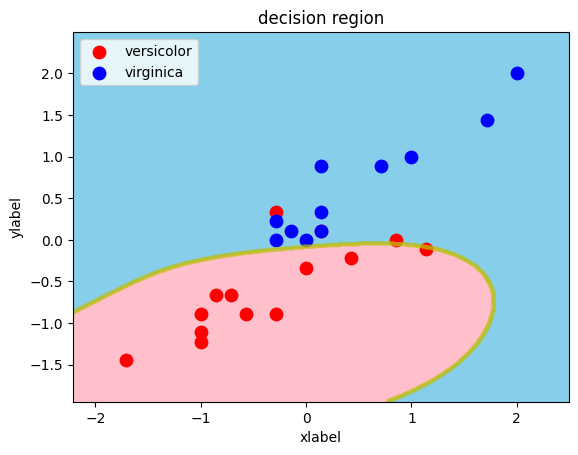

In [ ]:
print("SVM")
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predn)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Precision score = ", precision_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_svm))
decision_region(X_testTransform, y_test, svmcl)
print('\n')

In [ ]:
# LOGISTIC REGRESSION
lor_classifier = LogisticRegression()
lor_classifier.fit(X_trainTransform, y_train);
y_pred_lor = lor_classifier.predict(X_testTransform)

LOGISTIC REGRESSION
Accuracy =  88.0
Recall =  [0.78571429 1.        ]
F1 score =  [0.88 0.88]
Precision score =  [1.         0.78571429]
Confusion =  [[11  3]
 [ 0 11]]


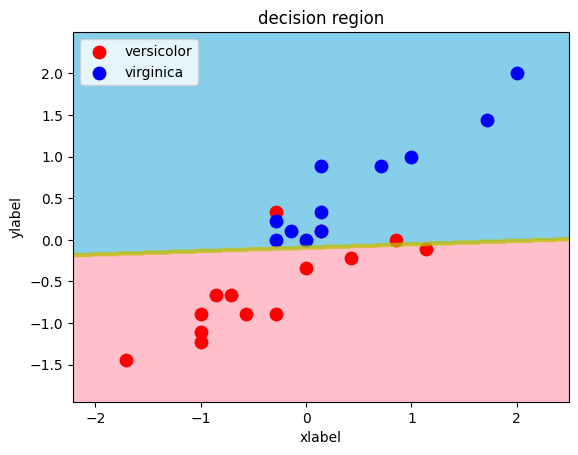

In [ ]:
print("LOGISTIC REGRESSION")
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_lor)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_lor, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_lor, average=None))
print("Precision score = ", precision_score(y_true=y_test, y_pred=y_pred_lor, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_lor))
decision_region(X_testTransform, y_test, lor_classifier)
print('\n')

In [ ]:
# DECISION TREE
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_trainTransform, y_train)
y_preddt = dtree.predict(X_testTransform)

DECISION TREE
Accuracy =  92.0
Recall =  [0.85714286 1.        ]
F1 score =  [0.92307692 0.91666667]
Precision score =  [1.         0.84615385]
Confusion =  [[12  2]
 [ 0 11]]


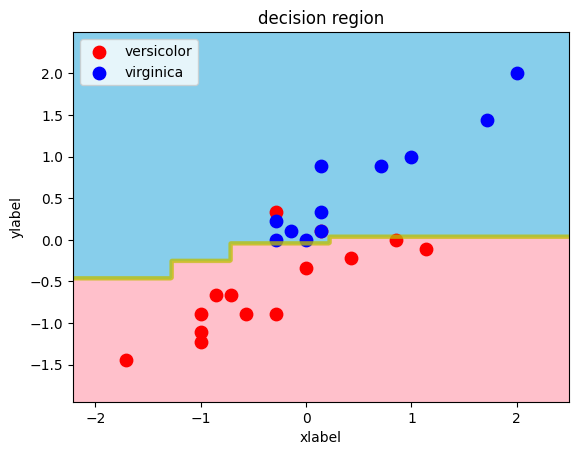

In [ ]:
print("DECISION TREE")
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_preddt)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_preddt, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Precision score = ", precision_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_preddt))
decision_region(X_testTransform, y_test, dtree)
print('\n')

In [ ]:
# RANDOM FOREST
rforest = RandomForestClassifier(random_state=0)
rforest.fit(X_trainTransform, y_train)
y_predrf = rforest.predict(X_testTransform)

RANDOM FOREST
Accuracy =  88.0
Recall =  [0.78571429 1.        ]
F1 score =  [0.88 0.88]
Precision score =  [1.         0.78571429]
Confusion =  [[11  3]
 [ 0 11]]


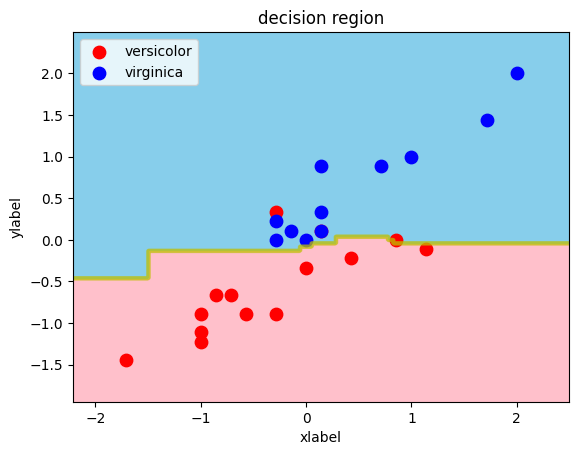

In [ ]:
print("RANDOM FOREST")
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predrf)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predrf, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Precision score = ", precision_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predrf))
decision_region(X_testTransform, y_test, rforest)
print('\n')

# Problem 9

In [ ]:
def comp_standard(title, prediction, model, std):
    print(title)
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("Precision score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
    decision_region(X_test, y_test, model)
model = [neigh, lor_classifier, dtree, rforest, svmcl]

KNN
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precision score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


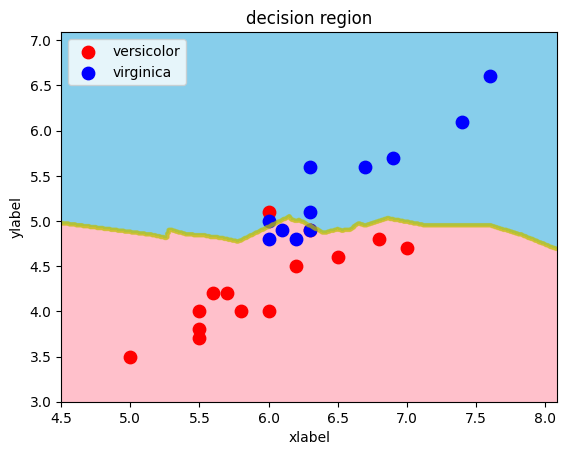

............................................................
LOGISTIC REGRESSION
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precision score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


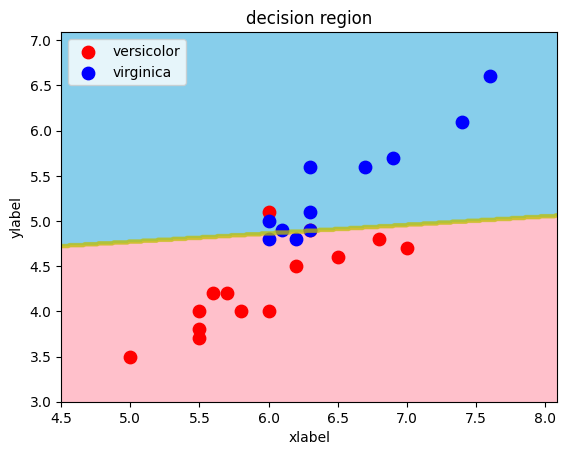

............................................................
SVM
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precision score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


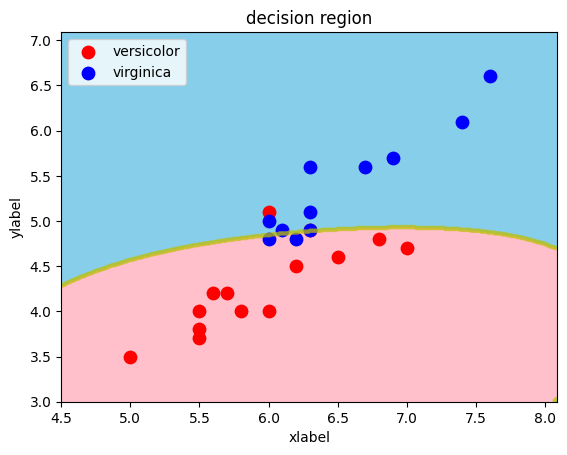

............................................................
DECISION TREE
Accuracy =  84.0
Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precision score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


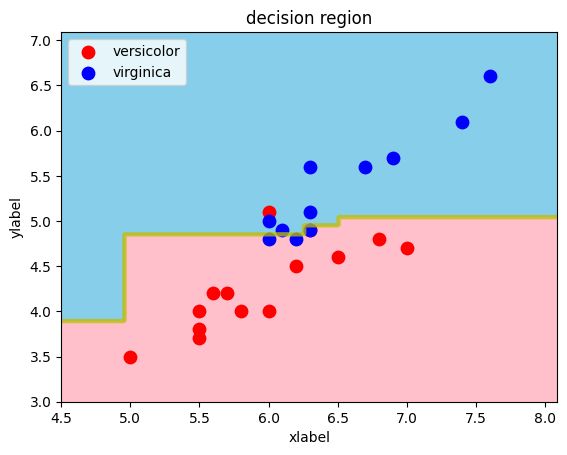

............................................................
RANDOM FOREST
Accuracy =  84.0
Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precision score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


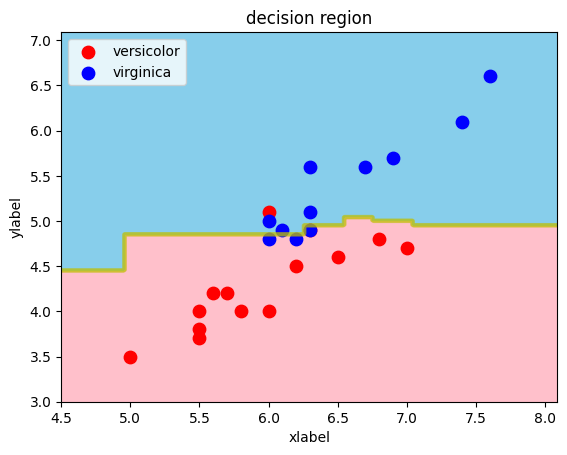

............................................................


In [ ]:
#KNN
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predn = neigh.predict(X_test)
comp_standard('KNN', y_predn, neigh, std=False)
print('............................................................')

#LOGISTIC REGRESSION
lor_classifier = LogisticRegression()
lor_classifier.fit(X_train, y_train)
y_pred_lor = lor_classifier.predict(X_test)
comp_standard('LOGISTIC REGRESSION', y_pred_lor, lor_classifier, std=False)
print('............................................................')

#SVM
svmcl = svm.SVC()
svmcl.fit(X_train, y_train)
y_pred_svm = svmcl.predict(X_test)
comp_standard('SVM', y_pred_svm, svmcl, std=False)
print('............................................................')

#DECISION TREE
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
comp_standard('DECISION TREE', y_pred_dt, dtree, std=False)
print('............................................................')

#RANDOM FOREST
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)
comp_standard('RANDOM FOREST', y_pred_rf, rforest, std=False)
print('............................................................')

# Problem 10

In [ ]:
# New Training Set
X1 = np.array(data.loc[:, ['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [ ]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Train Test Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [ ]:
#KNN
neigh1 = KNeighborsClassifier()
neigh1.fit(X1_train, y1_train)
y1_predn = neigh1.predict(X1_test)

#LOGISTIC REGRESSION
lor_classifier1 = LogisticRegression()
lor_classifier1.fit(X1_train, y1_train)
y1_pred_lor = lor_classifier1.predict(X1_test)

#SVM
svmcl1 = svm.SVC()
svmcl1.fit(X1_train, y1_train)
y1_pred_svm = svmcl1.predict(X1_test)

#DECISION TREE
dtree1 = DecisionTreeClassifier()
dtree1.fit(X1_train, y1_train)
y1_pred_dt = dtree1.predict(X1_test)

#RANDOM FOREST
rforest1 = RandomForestClassifier()
rforest1.fit(X_train, y_train)
y1_pred_rf = rforest1.predict(X1_test)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica', 'setosa']):
    # Setting
    scatter_color = ['red', 'blue', 'green']
    contour_color = ['pink', 'skyblue', 'purple']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contour_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
model = [neigh1, lor_classifier1, dtree1, rforest1, svmcl1]
#for a, model in enumerate(models, 1):
#    decision_region(X_testTransform, y_test, model)

KNN
Accuracy =  97.36842105263158
Recall =  [1.         1.         0.91666667]
F1 score =  [1.         0.95652174 0.95652174]
Precision score =  [1.         0.91666667 1.        ]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


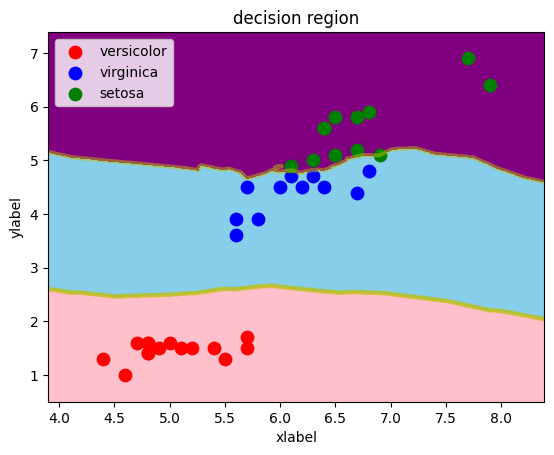

............................................................
SVM
[1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  97.36842105263158
Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precision score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


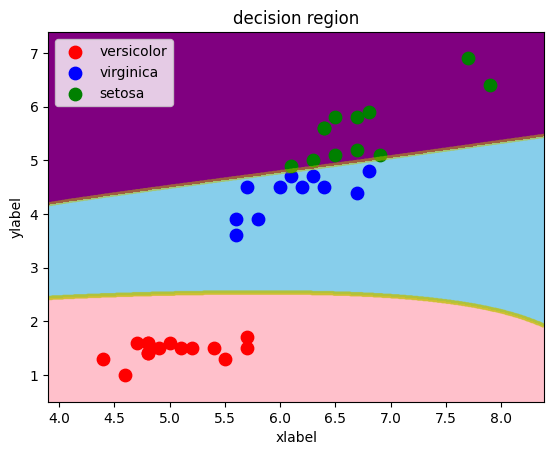

............................................................
LOGISTIC REGRESSION
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  100.0
Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precision score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


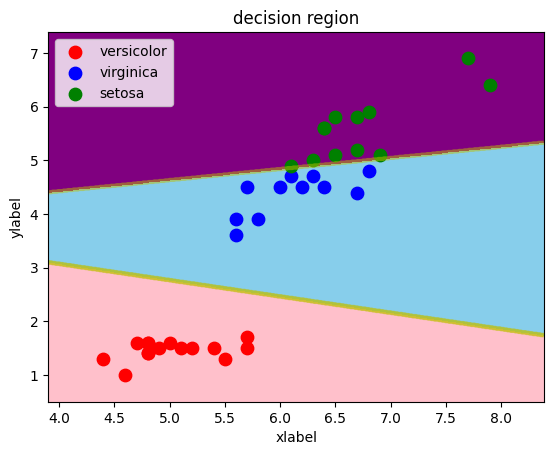

............................................................
DECISION TREE
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  97.36842105263158
Recall =  [1.         1.         0.91666667]
F1 score =  [1.         0.95652174 0.95652174]
Precision score =  [1.         0.91666667 1.        ]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


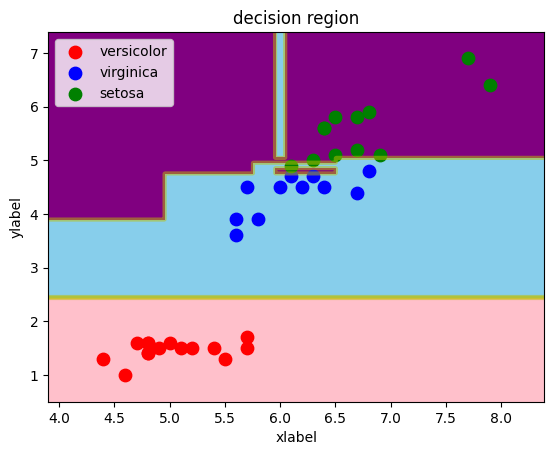

............................................................
RANDOM FOREST
[1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1
 1]
Accuracy =  60.526315789473685
Recall =  [0. 1. 1.]
F1 score =  [0.         0.59459459 1.        ]
Precision score =  [0.         0.42307692 1.        ]
Confusion =  [[ 0 15  0]
 [ 0 11  0]
 [ 0  0 12]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


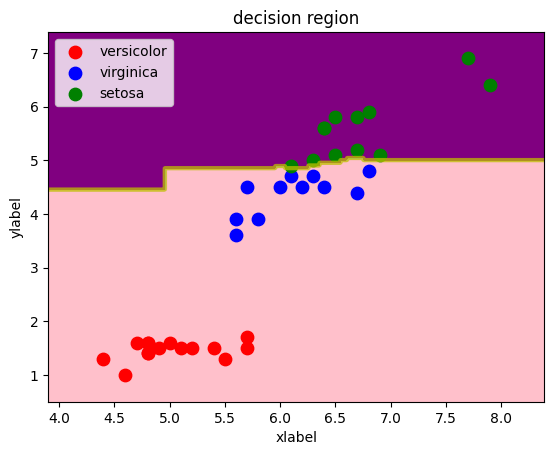

............................................................


In [ ]:
print("KNN")
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_predn)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("Precision score = ", precision_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_predn))
decision_region(X1_test, y1_test, neigh1)
print('............................................................')

print("SVM")
print(y1_predn)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_predn)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("Precision score = ", precision_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_svm))
decision_region(X1_test, y1_test, svmcl1)
print('............................................................')

print("LOGISTIC REGRESSION")
print(y1_pred_lor)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_lor)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_lor, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_pred_lor, average=None))
print("Precision score = ", precision_score(y_true=y1_test, y_pred=y1_pred_lor, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_lor))
decision_region(X1_test, y1_test, lor_classifier1)
print('............................................................')

print("DECISION TREE")
print(y1_pred_dt)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_dt)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_dt, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_pred_dt, average=None))
print("Precision score = ", precision_score(y_true=y1_test, y_pred=y1_pred_dt, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_dt))
decision_region(X1_test, y1_test, dtree1)
print('............................................................')

print("RANDOM FOREST")
print(y1_pred_rf)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_rf)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_rf, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_pred_rf, average=None))
print("Precision score = ", precision_score(y_true=y1_test, y_pred=y1_pred_rf, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_rf))
decision_region(X1_test, y1_test, rforest1)
print('............................................................')